In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2012-01-01'
end = '2021-12-21'
stock = 'GME'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,6.107500,6.147500,5.937500,5.947500,4.004452,10252800
1,2012-01-04,5.937500,6.045000,5.922500,6.032500,4.061683,8317600
2,2012-01-05,5.997500,6.320000,5.965000,6.315000,4.251891,14776000
3,2012-01-06,6.302500,6.307500,6.175000,6.217500,4.186244,15113600
4,2012-01-09,6.165000,6.175000,5.845000,5.997500,4.038118,27824000
...,...,...,...,...,...,...,...
2504,2021-12-14,32.750000,37.592499,32.375000,36.922501,36.922501,26048400
2505,2021-12-15,36.865002,38.000000,35.279999,37.147499,37.147499,11064000
2506,2021-12-16,38.232498,38.610001,35.532501,36.147499,36.147499,8659200
2507,2021-12-17,35.937500,39.642502,34.832500,38.910000,38.910000,17226800


In [7]:
ma_100_days = data.Close.rolling(100).mean()

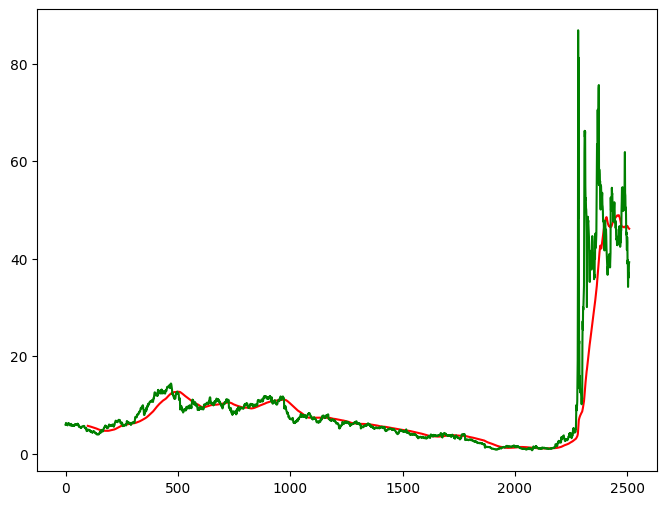

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

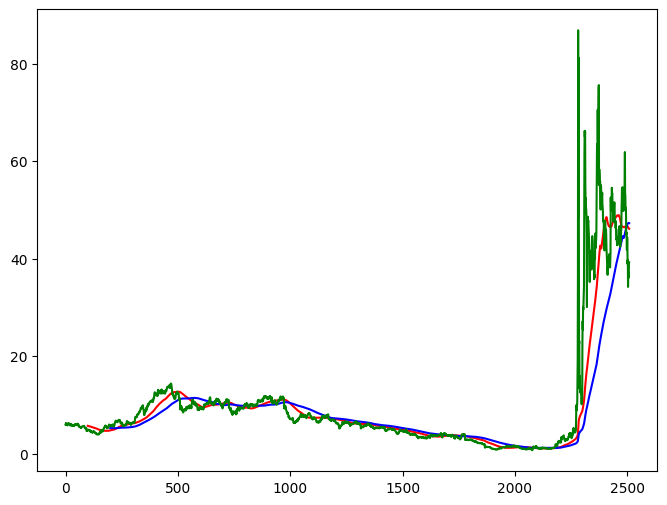

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])


In [13]:
data_train.shape[0]

2007

In [14]:
data_test.shape[0]

502

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [18]:
x, y = np.array(x), np.array(y)

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\s prakash naidu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 25s 231ms/step - loss: 0.1006
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - loss: 0.0104
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - loss: 0.0092
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - loss: 0.0100
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - loss: 0.0073
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - loss: 0.0075
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 222ms/step - loss: 0.0058
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - loss: 0.0067
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - loss: 0.0071
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - loss: 0.0082
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - loss: 0.0056
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - loss: 0.0052
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 219ms/step - loss: 0.0050
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step - loss: 0.0058
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
pas_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [26]:
data_test_scale  =  scaler.fit_transform(data_test)

In [27]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step


In [29]:
y_predict = y_predict*scale

NameError: name 'scale' is not defined

In [ ]:
scale =1/scaler.scale_


In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_true = [0, 1, 1, 0, 1, 0, 1, 0]
y_pred = [0, 1, 0, 0, 1, 1, 1, 0]


In [ ]:
metrics = {'Accuracy': accuracy_score(y_true, y_pred),
           'Precision': precision_score(y_true, y_pred),
           'Recall': recall_score(y_true, y_pred),
           'F1 Score': f1_score(y_true, y_pred)}

metrics

In [ ]:
model.save('Stock_Prediction_Model.keras')
